<a href="https://colab.research.google.com/github/santiagoahl/Introduction-to-Machine-Learning2021-I/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression algorithm using NNets representation and gradient descent

In this notebook I will show how can we view NNets as computational graphs in order to finds a logistic regresor that classifies data in $R^n$ into 2 classes. We also work with the gradient descent algorithm in order to optimize de the cost function and hence to obtain a good classifier.

>[Logistic regression algorithm using NNets representation and gradient descent](#updateTitle=true&folderId=1om8FE2WbqI_0fYPyYldVyLfQxO9_tIfF&scrollTo=GwyLufl3_-kW)

>>[Data Generation](#updateTitle=true&folderId=1om8FE2WbqI_0fYPyYldVyLfQxO9_tIfF&scrollTo=31NYXAMp_zn_)

>>[Overview: Sigmoid Function](#updateTitle=true&folderId=1om8FE2WbqI_0fYPyYldVyLfQxO9_tIfF&scrollTo=WIBb_bXR_3Rm)



## Libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
drive.mount('/content/drive')o

In [15]:
plt.style.use('seaborn-bright')

In [91]:
%run '/content/drive/MyDrive/personal-projects/machine-learning-algorithms/Logistic Regression/utils.ipynb'

## Data Generation

We are going to work in $R^2$ (Visualization purposes). In general we set the dimension of the data points as $n$, the training dataset size as $m$ and hence each data point will have this form: $\text{x} = [1, x_1, \dots, x_n]$.

In [128]:
X = np.random.rand(10, 2)

In [137]:
X.shape

(10, 2)

In [138]:
w_ideal.shape

(3,)

In [139]:
# Generate a 2D array of random numbers between 0 and 1
random_vectors = np.random.rand(100, 2)

# Create an array of ones with the same shape as random_vectors
ones = np.ones((random_vectors.shape[0], 1))

# Concatenate the ones array and the random_vectors array along the second axis to create 3D vectors
flattened_vectors = np.concatenate((ones, random_vectors), axis=1)

In [142]:
flattened_vectors

array([[1.00000000e+00, 7.02220795e-03, 8.54762469e-01],
       [1.00000000e+00, 2.91676479e-02, 6.33923480e-01],
       [1.00000000e+00, 1.98552119e-01, 8.76460287e-01],
       [1.00000000e+00, 4.36873703e-01, 3.82639655e-01],
       [1.00000000e+00, 1.67633529e-01, 7.23688553e-01],
       [1.00000000e+00, 6.99172440e-02, 1.63893406e-01],
       [1.00000000e+00, 1.68219569e-01, 3.01360258e-01],
       [1.00000000e+00, 1.57273087e-01, 8.69192689e-01],
       [1.00000000e+00, 3.21469635e-01, 1.78527708e-01],
       [1.00000000e+00, 7.67627351e-01, 4.59214045e-01],
       [1.00000000e+00, 7.43277048e-01, 6.69656365e-02],
       [1.00000000e+00, 8.86923132e-01, 5.19351668e-01],
       [1.00000000e+00, 8.03460215e-01, 8.05353735e-01],
       [1.00000000e+00, 8.26030775e-01, 2.73785789e-01],
       [1.00000000e+00, 7.75931464e-01, 5.31801650e-01],
       [1.00000000e+00, 6.82869381e-01, 7.62051345e-01],
       [1.00000000e+00, 8.88391258e-01, 4.33830747e-01],
       [1.00000000e+00, 1.81873

In [117]:
w_ideal = np.random.rand(1, 3)[0]

In [136]:
z = perceptron(w_ideal)
z

1.1787100869379348

In [135]:
y_prob = sigmoid()

1.1787100869379348

In [130]:
X

array([[0.03862397, 0.89368524],
       [0.51824798, 0.41043773],
       [0.87555226, 0.96225443],
       [0.63886483, 0.68568763],
       [0.95284614, 0.77595864],
       [0.00271093, 0.85411762],
       [0.73719525, 0.88093458],
       [0.30299243, 0.51667825],
       [0.57045343, 0.50251018],
       [0.44617217, 0.16271385]])

In [ ]:
y_prob = sigmoid(np.dot(w_ideal, np.insert(arr=x, obj=0, values=1)))

In [101]:
y_prob

array([[0.63212607, 0.57074608],
       [0.68352982, 0.61631517],
       [0.72163622, 0.71866145],
       [0.71563986, 0.50957859],
       [0.51612799, 0.57760155],
       [0.59642207, 0.64329486],
       [0.5217034 , 0.70023273],
       [0.7039025 , 0.57262896],
       [0.69765494, 0.61888965],
       [0.59826093, 0.59398048]])

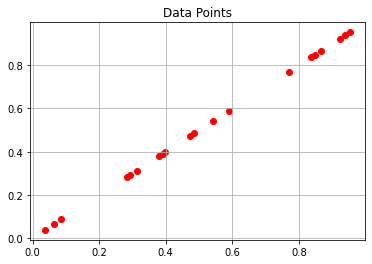

In [49]:
plot_scatter(x, x, title='Data Points')

## Perceptron

Observe the initial vector $\text{w}=[b, w_1, w_2]$ and a data point $x=[1, x_1, x_2]$

In [104]:
w = np.array([-3, 1, 2])
x = np.array([3, -1])

So let's build a simple perceptron whose inputs are $\text{x}$ and $\text{w}$ and the output is $$\sum_{i\in[n]}w_ix_i = \text{w}^T\text{x}$$

In [110]:
def perceptron(w, x):
  x = np.insert(arr=x, obj=0, values=1)
  return w.dot(x)

In [115]:
print('The output of x = {} and w = {} is {}'.format(x, w, perceptron(w, x)))

The output of x = [ 3 -1] and w = [-3  1  2] is -2


## Sigmoid Function

In [28]:
def sigmoid(z):
  sig = 1 / (1 + np.exp(-z))
  return sig

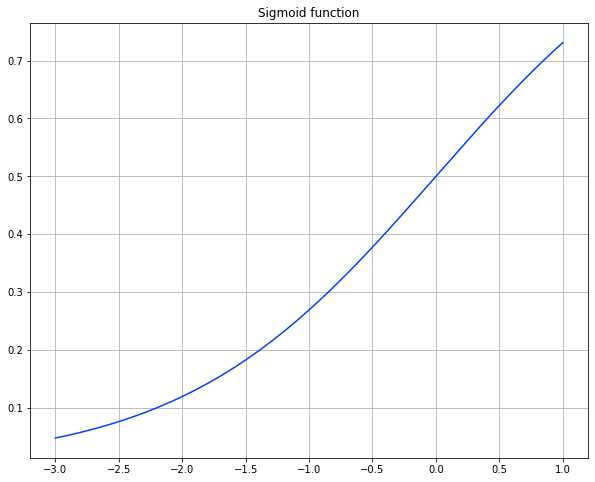

In [92]:
plot_line(sigmoid, x=np.linspace(-3, 1, 1000), title='Sigmoid function')

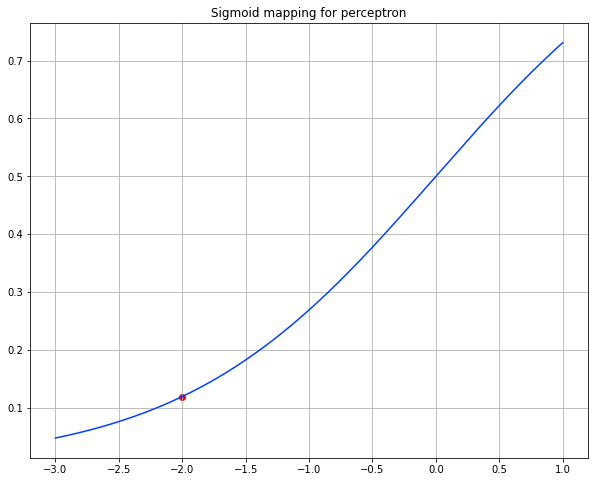

In [47]:
plot_line(sigmoid, x=np.linspace(-3, 1, 1000), title='Sigmoid function')
plot_scatter(x=z(w, x), y=sigmoid(z(w, x)), title='Sigmoid mapping for perceptron')
plt.show()

## Cross Entropy

Formula:
$$
  \mathcal{L}(\hat{y}, y) = -\big(ylog(\hat{y}) + (1-y)log(1-\hat{y})\big)
$$

In [62]:
y_hat = np.random.rand(10)# also named y_pred

In [81]:
print('y_hat: {}'.format(y_hat))

y_hat: [0.34854786 0.9553393  0.80513991 0.41116315 0.29381548 0.50426738
 0.15108355 0.71924504 0.49988664 0.61633688]


In [97]:
def cross_entropy(y:float, y_hat:float=1)->float:
  y_hat = np.maximum(y_hat, 1e-10)
  y = np.maximum(y, 1e-10)
  loss = - (y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
  return loss

In [72]:
print('y_hat: {} \n y: {} \n Loss: {}'.format(y_hat[0], y[0], cross_entropy(y[0], y_hat[0])))

y_hat: 0.34854785588831305 
 y: 0 
 Loss: 0.4285513400473595


## Cost function

In [75]:
def J(y:np.array, y_hat:np.array=1)->float:
  loss_vector = cross_entropy(y_hat, y)
  print(loss_vector)
  cost = np.mean(loss_vector)
  return cost

In [78]:
y_hat

array([0.34854786, 0.9553393 , 0.80513991, 0.41116315, 0.29381548,
       0.50426738, 0.15108355, 0.71924504, 0.49988664, 0.61633688])

In [79]:
print('y_hat: {} \n y: {} \n Loss: {}'.format(y_hat, y, J(y_hat, y)))

[0.42855134 0.04568872 0.21673921 0.88876519 0.34787871 0.68464864
 0.16379451 0.32955317 0.69337392 0.95799041]
y_hat: [0.34854786 0.9553393  0.80513991 0.41116315 0.29381548 0.50426738
 0.15108355 0.71924504 0.49988664 0.61633688] 
 y: [0 1 1 1 0 1 0 1 1 0] 
 Loss: 0.47569838077476484


## Optimization: Gradient Descent